In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1533b68c322ab6c6bb847cd4ac7a015e


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | lagoa
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | northam
Processing Record 7 of Set 1 | airai
Processing Record 8 of Set 1 | hofn
Processing Record 9 of Set 1 | aden
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | maloyaz
City not found. Skipping...
Processing Record 14 of Set 1 | tuatapere
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | eureka
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | kavieng
Processing

City not found. Skipping...
Processing Record 35 of Set 4 | lata
Processing Record 36 of Set 4 | kimbe
Processing Record 37 of Set 4 | vao
Processing Record 38 of Set 4 | saldanha
Processing Record 39 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 40 of Set 4 | dakar
Processing Record 41 of Set 4 | ciudad bolivar
Processing Record 42 of Set 4 | akdepe
Processing Record 43 of Set 4 | biak
Processing Record 44 of Set 4 | sambrial
Processing Record 45 of Set 4 | ayotzintepec
Processing Record 46 of Set 4 | krasnyy yar
Processing Record 47 of Set 4 | pacific grove
Processing Record 48 of Set 4 | leningradskiy
Processing Record 49 of Set 4 | indiana
Processing Record 50 of Set 4 | methoni
Processing Record 1 of Set 5 | taitung
Processing Record 2 of Set 5 | skibbereen
Processing Record 3 of Set 5 | jackson
Processing Record 4 of Set 5 | chapais
Processing Record 5 of Set 5 | camara de lobos
Processing Record 6 of Set 5 | udachnyy
Processing Record 7 of Set 5 | cahors
P

Processing Record 25 of Set 8 | bukachacha
Processing Record 26 of Set 8 | petrov val
Processing Record 27 of Set 8 | porciuncula
Processing Record 28 of Set 8 | mokobeng
Processing Record 29 of Set 8 | yenagoa
Processing Record 30 of Set 8 | praia da vitoria
Processing Record 31 of Set 8 | provideniya
Processing Record 32 of Set 8 | tilichiki
Processing Record 33 of Set 8 | chokurdakh
Processing Record 34 of Set 8 | maldonado
Processing Record 35 of Set 8 | paamiut
Processing Record 36 of Set 8 | coihaique
Processing Record 37 of Set 8 | marawi
Processing Record 38 of Set 8 | gannan
Processing Record 39 of Set 8 | pamanukan
Processing Record 40 of Set 8 | nuuk
Processing Record 41 of Set 8 | naples
Processing Record 42 of Set 8 | pimentel
Processing Record 43 of Set 8 | tautira
Processing Record 44 of Set 8 | inongo
Processing Record 45 of Set 8 | mtwara
Processing Record 46 of Set 8 | mae chan
Processing Record 47 of Set 8 | mazyr
Processing Record 48 of Set 8 | ankara
Processing Rec

Processing Record 14 of Set 12 | burewala
Processing Record 15 of Set 12 | lasa
Processing Record 16 of Set 12 | san cristobal
Processing Record 17 of Set 12 | iquique
Processing Record 18 of Set 12 | lusambo
Processing Record 19 of Set 12 | redmond
Processing Record 20 of Set 12 | lensk
Processing Record 21 of Set 12 | whyalla
Processing Record 22 of Set 12 | almaty
Processing Record 23 of Set 12 | nanortalik
Processing Record 24 of Set 12 | kargasok
Processing Record 25 of Set 12 | puri
Processing Record 26 of Set 12 | aripuana
Processing Record 27 of Set 12 | bennettsville
Processing Record 28 of Set 12 | westport
Processing Record 29 of Set 12 | gondar
Processing Record 30 of Set 12 | tongchuan
Processing Record 31 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 32 of Set 12 | caxito
Processing Record 33 of Set 12 | shenzhen
Processing Record 34 of Set 12 | inuvik
Processing Record 35 of Set 12 | ankazoabo
Processing Record 36 of Set 12 | gamba
Proces

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,15.66,91,100,17.31,RU,2022-04-30 14:13:26
1,Lagoa,39.0500,-27.9833,60.91,85,2,13.02,PT,2022-04-30 14:09:28
2,Mataura,-46.1927,168.8643,58.48,93,72,4.12,NZ,2022-04-30 14:13:27
3,Cabo San Lucas,22.8909,-109.9124,72.52,52,22,10.02,MX,2022-04-30 14:13:21
4,Northam,51.0333,-4.2167,56.66,61,100,2.28,GB,2022-04-30 14:13:27
5,Airai,-8.9266,125.4092,60.62,90,89,3.20,TL,2022-04-30 14:13:28
6,Hofn,64.2539,-15.2082,47.64,76,9,11.95,IS,2022-04-30 14:13:29
7,Aden,12.7794,45.0367,85.41,74,0,12.28,YE,2022-04-30 14:13:29
8,Bethel,41.3712,-73.4140,55.98,37,0,8.05,US,2022-04-30 14:13:30
9,Busselton,-33.6500,115.3333,57.24,80,0,6.76,AU,2022-04-30 14:13:30


In [10]:
#Re-order the columns:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-04-30 14:13:26,71.9167,114.0833,15.66,91,100,17.31
1,Lagoa,PT,2022-04-30 14:09:28,39.0500,-27.9833,60.91,85,2,13.02
2,Mataura,NZ,2022-04-30 14:13:27,-46.1927,168.8643,58.48,93,72,4.12
3,Cabo San Lucas,MX,2022-04-30 14:13:21,22.8909,-109.9124,72.52,52,22,10.02
4,Northam,GB,2022-04-30 14:13:27,51.0333,-4.2167,56.66,61,100,2.28


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

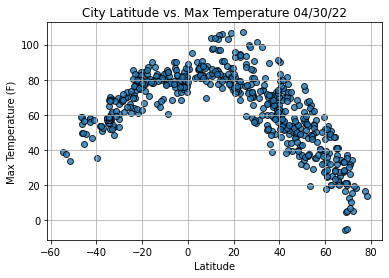

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

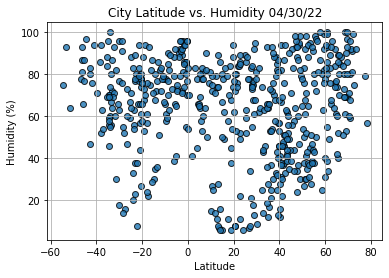

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

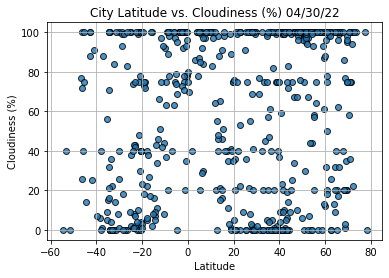

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

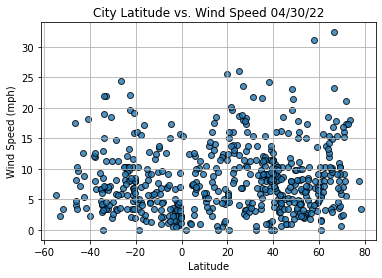

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2022-04-30 14:13:33
Lat                        3.0707
Lng                      172.7902
Max Temp                    80.76
Humidity                       83
Cloudiness                     86
Wind Speed                  12.35
Name: 13, dtype: object

In [32]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
542     True
543    False
544     True
545     True
546     True
Name: Lat, Length: 547, dtype: bool

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-04-30 14:13:26,71.9167,114.0833,15.66,91,100,17.31
1,Lagoa,PT,2022-04-30 14:09:28,39.0500,-27.9833,60.91,85,2,13.02
3,Cabo San Lucas,MX,2022-04-30 14:13:21,22.8909,-109.9124,72.52,52,22,10.02
4,Northam,GB,2022-04-30 14:13:27,51.0333,-4.2167,56.66,61,100,2.28
6,Hofn,IS,2022-04-30 14:13:29,64.2539,-15.2082,47.64,76,9,11.95


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

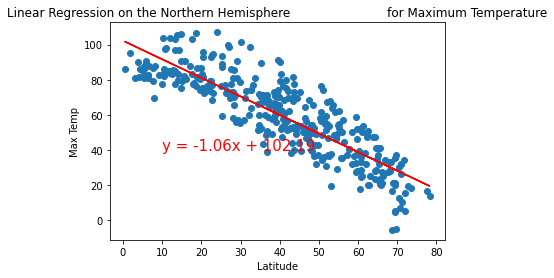

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

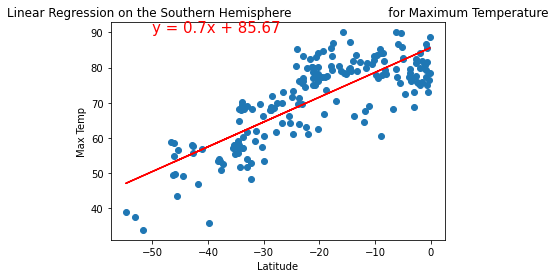

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

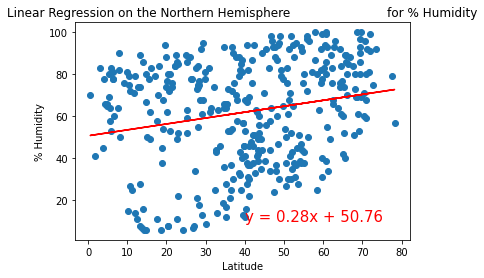

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

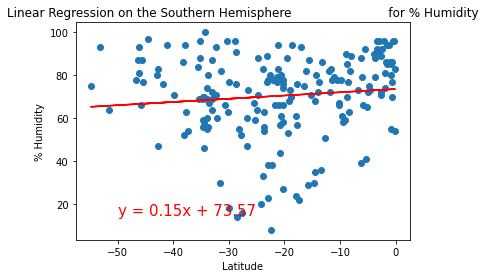

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

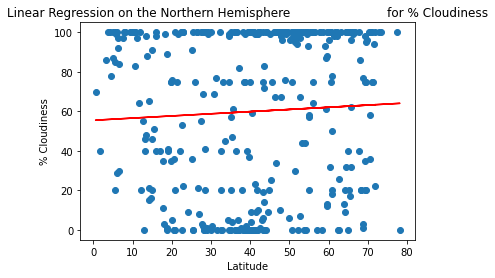

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

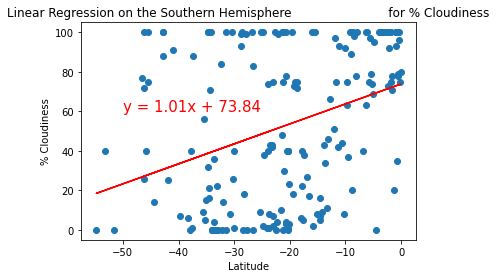

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

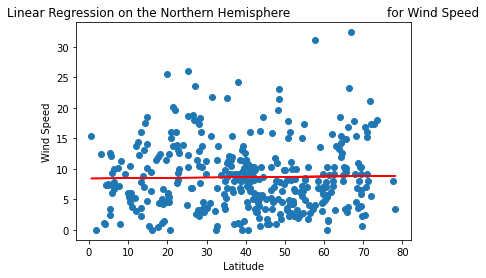

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

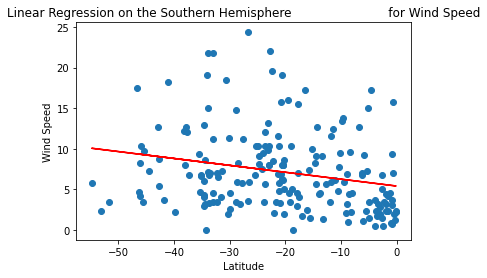

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))